In [3]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from base import DecisionTree
from metrics import *

np.random.seed(42)
num_average_time = 100


In [4]:
def generate_data(N, M):
    X = np.random.randint(2, size=(N, M))
    y = np.random.randint(2, size=N)
    X = pd.DataFrame(X)
    y = pd.Series(y)
    return X, y

def measure_training_time(model, X, y):
    start_time = time.time()
    model.fit(X, y)
    return time.time() - start_time

def measure_prediction_time(model, X):
    start_time = time.time()
    model.predict(X)
    return time.time() - start_time

In [5]:
Ns = [1000, 10000, 100000]
Ms = [10, 100, 1000]


results = {}

In [6]:
results = {}

for N in Ns:
    training_times = []
    prediction_times = []
    for M in Ms:
        training_time_sum = 0
        prediction_time_sum = 0
        for i in range(3):
            tree = DecisionTree(criterion="information_gain")
            X, y = generate_data(N, M)
            X_train = X.iloc[:int(0.7 * N)]
            y_train = y.iloc[:int(0.7 * N)]
            X_test = X.iloc[int(0.7 * N):]
            y_test = y.iloc[int(0.7 * N):]
            training_time_sum += measure_training_time(tree, X_train, y_train)
            prediction_time_sum += measure_prediction_time(tree, X_test)
        training_times.append(training_time_sum/3)
        prediction_times.append(prediction_time_sum/3)
        print("Done ", N, " ", M )
    results[N] = (training_times, prediction_times)

Done  1000   10
Done  1000   100
Done  1000   1000
Done  10000   10
Done  10000   100
Done  10000   1000
Done  100000   10
Done  100000   100
Done  100000   1000


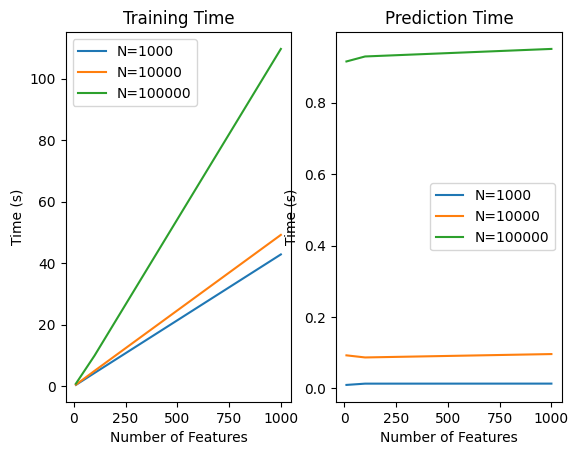

In [7]:
fig, ax = plt.subplots(1, 2)
ax[0].set_title("Training Time")
ax[1].set_title("Prediction Time")
ax[0].set_xlabel("Number of Features")
ax[1].set_xlabel("Number of Features")
ax[0].set_ylabel("Time (s)")
ax[1].set_ylabel("Time (s)")
ax[0].plot(Ms, results[1000][0], label="N=1000")
ax[0].plot(Ms, results[10000][0], label="N=10000")
ax[0].plot(Ms, results[100000][0], label="N=100000")
ax[1].plot(Ms, results[1000][1], label="N=1000")
ax[1].plot(Ms, results[10000][1], label="N=10000")
ax[1].plot(Ms, results[100000][1], label="N=100000")
ax[0].legend()
ax[1].legend()
# plt.tight_layout()
plt.show()